<a href="https://colab.research.google.com/github/zly554411-arch/ECON3916-Statistical-Machine-Learning/blob/main/Assignment/Econ_3916_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Phase 1: Prepare (Logic & Control Flow)
# ========================================
# Step 1.1: Construct the "Student Basket"
# ========================================

In [36]:
# Manual Data Construction
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Spotify & Netflix', 'Price_2016': 25, 'Price_2024': 38}
]

In [37]:
# ===============================================
# Step 1.2: Compute Inflation (Loops & Functions)
# ===============================================

In [38]:
# Define the "Machine" (Function)
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

# Run the Loop
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Chipotle Burrito: 53.33% Inflation
Spotify & Netflix: 52.00% Inflation


In [39]:
# Phase 2: Process (The API Pipeline)
# ===================================
# Step 2.1: The "Data Proxy" Strategy
# ===================================

In [40]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='8aa2b42808ee42e6c3dd55a4fcd38909')

# Fetch Series
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA') # Added Rent
chipotle_burrito = fred.get_series('CUSR0000SEFV')
spotify_netflix = fred.get_series('CUSR0000SERA02')
# ... fetch remaining series

In [41]:
# ========================================
# Step 2.2: Normalization Logic (CRITICAL)
# ========================================

In [42]:
reindex_dict = {
    'CPI': official_cpi,
    'Tuition': tuition,
    'Rent': rent,
    'Food Away From Home': chipotle_burrito,
    'Cable & Streaming TV': spotify_netflix
}

In [43]:
data = {}

In [44]:
for name, value in reindex_dict.items():
  base_value = value.loc['2016-01-01']
  data[name] = (value / base_value) * 100

In [45]:
import pandas as pd
df = pd.DataFrame(data)
df = df.loc['2016':'2024']

In [46]:
df

,CPI,Tuition,Rent,Food Away From Home,Cable & Streaming TV
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000
2016-02-01,99.867032,100.241572,100.314364,100.138869,100.723912
2016-03-01,100.180095,100.470288,100.607131,100.355827,101.450163
2016-04-01,100.563850,100.692146,100.924580,100.599712,101.878663
2016-05-01,100.801592,100.929861,101.258485,100.813978,102.214306
...,...,...,...,...,...
2024-08-01,132.181088,123.818388,144.904697,142.464552,136.232569
2024-09-01,132.484052,124.539534,145.329105,142.947707,135.930140
2024-10-01,132.784071,124.849106,145.769626,143.286993,135.687822
2024-11-01,133.156464,125.191108,146.131299,143.688596,135.924292


In [47]:
df.index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01',
               ...
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
               '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01',
               '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', length=108, freq='MS')

In [48]:
# Phase 3: Analyze (The Index Theory & Visualization)
# ===================================================
# Step 3.1: Visualizing Raw Components
# ===================================================

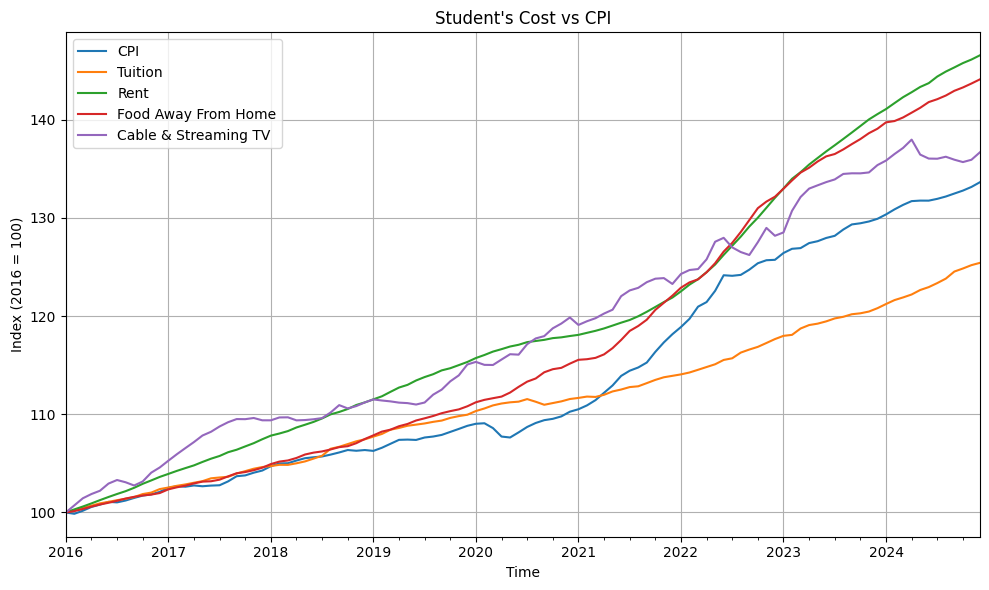

In [49]:
import matplotlib.pyplot as plt

df.plot(figsize=(10, 6))

plt.title("Student's Cost vs CPI")
plt.xlabel("Time")
plt.ylabel("Index (2016 = 100)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
# ===================================================
# Step 3.2: The Weighted "Student SPI" (Honest Chart)
# ===================================================

In [51]:
weight = {
    'Tuition': 0.4,
    'Rent': 0.3,
    'Food Away From Home': 0.2,
    'Cable & Streaming TV': 0.1
}

In [52]:
df['Student_SPI'] = (weight['Tuition'] * df['Tuition'] +
                     weight['Rent'] * df['Rent'] +
                     weight['Food Away From Home'] * df['Food Away From Home'] +
                     weight['Cable & Streaming TV'] * df['Cable & Streaming TV'])

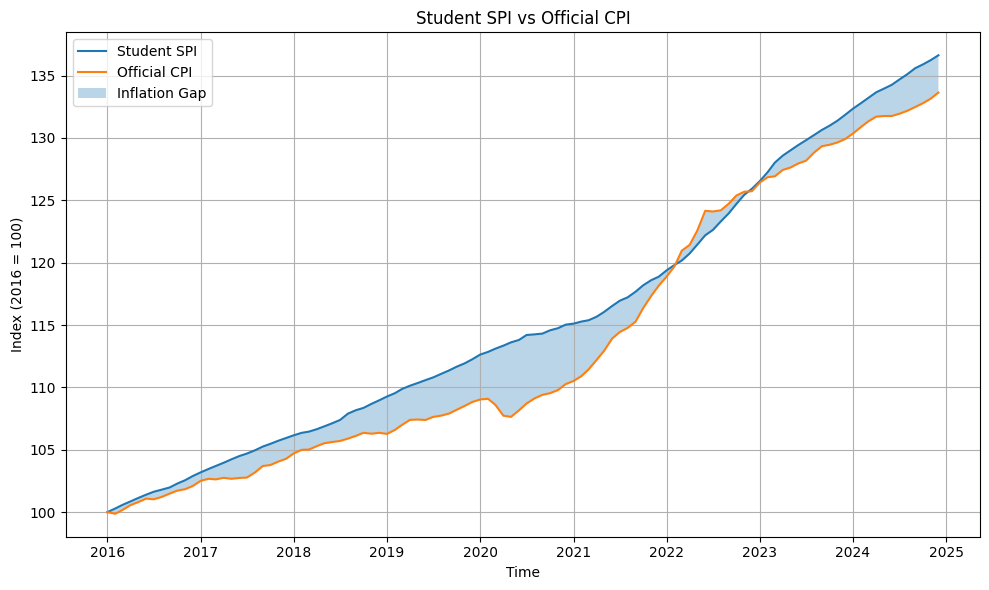

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(df.index, df['Student_SPI'], label = 'Student SPI')
plt.plot(df.index, df['CPI'], label = 'Official CPI')

plt.fill_between(
    df.index,
    df['Student_SPI'],
    df['CPI'],
    alpha = 0.3,
    label = 'Inflation Gap'
)

plt.title("Student SPI vs Official CPI")
plt.xlabel("Time")
plt.ylabel("Index (2016 = 100)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
# ==============================================
# Step 3.3: The Scale Fallacy (Why We Normalize)
# ==============================================

In [55]:
tuition_raw = tuition.loc['2016':'2024']
spotify_netflix_raw = spotify_netflix.loc['2016':'2024']

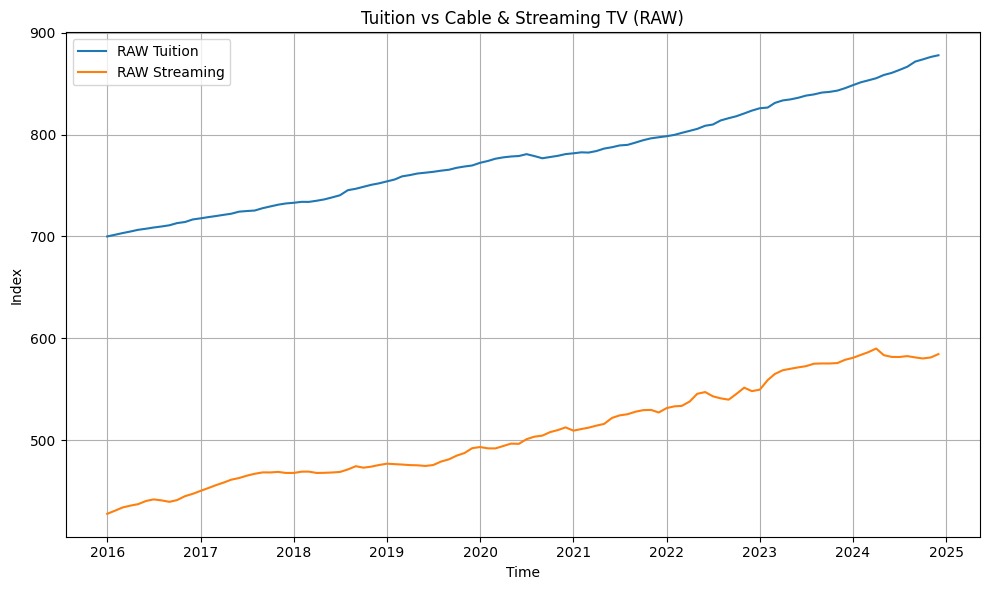

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(tuition_raw.index, tuition_raw, label = 'RAW Tuition')
plt.plot(spotify_netflix_raw.index, spotify_netflix_raw, label = 'RAW Streaming')

plt.title("Tuition vs Cable & Streaming TV (RAW)")
plt.xlabel("Time")
plt.ylabel("Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The raw data are relative measures rather than absolute values. The index measures variation relative to a base year, for example, in the previsou example, the base line index is defined as 100. When two indices have different base years, their reference points are different.

As a result, directly comparing two raw indices ignores the fact that they are anchored to different base years, reflect different lengths of time of growth, and are influenced by different economic conditions during those periods.

In the “bad chart,” the tuition index appears to be nearly 900, while the streaming index is around 600. However, this does not imply that tuition costs are 1.5 times higher than streaming costs, nor that tuition has grown more. This is because the tuition index is based on 1982, whereas the streaming index is based on 2002. The higher numerical value reflects a longer accumulation of growth, not a meaningful comparison of price levels or growth rates.

Therefore, comparing raw indices with different base years (e.g., 1982 vs. 2002) is a “data crime” because it violates the fundamental rule of data comparability. Such misleading comparisons can lead to incorrect interpretations and potentially affect policy decisions or investment choices.

In [57]:
# Phase 4: AI Expansion (The Co-Pilot Era)
# =============================================================
# Task 4.1: The Ultimate Reality Check (Boston vs. USA vs. You)
# =============================================================

MACROECONOMIC ANALYSIS: Regional Inflation Disparities

Fetching Boston-Cambridge-Newton CPI data...
✓ Boston CPI fetched: 119 observations
  Date range: 2016-01-01 to 2025-11-01
  Data frequency: 31 days 00:00:00

Checking for missing values...
⚠ Found 54 missing values
  Applying forward fill to handle gaps...
✓ Missing values handled

Normalizing Boston CPI to Jan 1, 2016 = 100...
  Base value (Jan 2016): 257.21
  Latest value (normalized): 131.61
  Total Boston inflation: 31.61%

Fetching National CPI for comparison...


/tmp/ipython-input-192068295.py:47: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  boston_cpi_complete = boston_cpi_complete.fillna(method='ffill').fillna(method='bfill')



Creating comparison dataset...
✓ Comparison dataset created with 108 observations

SUMMARY STATISTICS (Jan 2016 = 100)
       Index  Start (2016)  End (Latest)  Total Change
National CPI         100.0    133.642048     33.642048
  Boston CPI         100.0    131.606633     31.606633
 Student SPI         100.0    136.328534     36.328534

VISUALIZATION: Regional Inflation Disparities


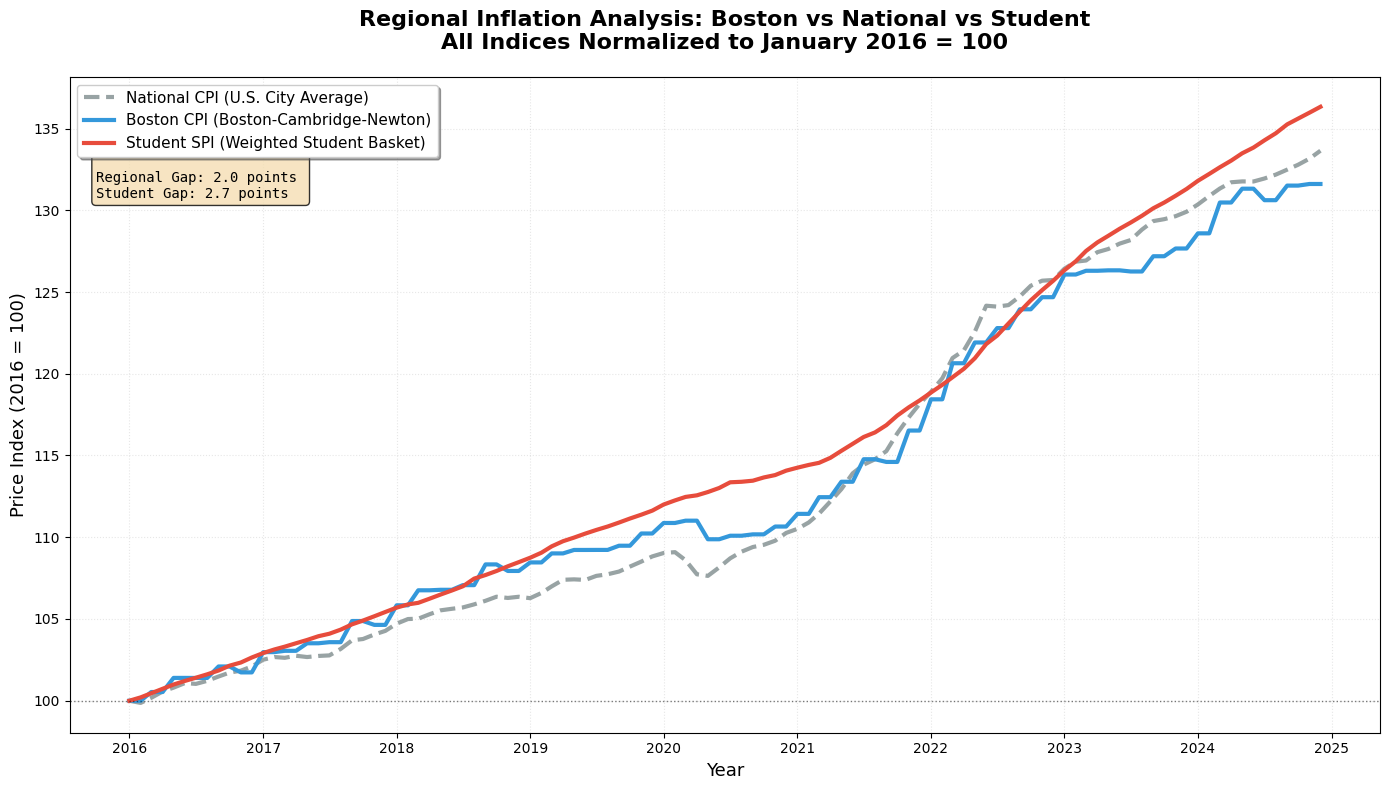

✓ Chart saved: regional_inflation_comparison.png

MACROECONOMIC INSIGHTS: Regional Disparities

1. REGIONAL DISPARITY:
   Boston CPI is -2.0 points below national average
   This represents -1.52% higher regional inflation

2. STUDENT BURDEN:
   Students face +2.7 points higher inflation
   Student costs grew 2.0% faster than national CPI

3. COMPOUNDING EFFECT:

4. PURCHASING POWER:
   $100 in Jan 2016 requires:
   - National: $133.64 for equivalent purchasing power
   - Boston: $131.61 for equivalent purchasing power
   - Student: $136.33 for equivalent purchasing power



In [58]:
# ============================================================================
# REGIONAL INFLATION ANALYSIS: BOSTON VS NATIONAL VS STUDENT
# Acting as a Macroeconomist analyzing regional disparities
# ============================================================================

import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Initialize FRED API
fred = Fred(api_key='8aa2b42808ee42e6c3dd55a4fcd38909')

print("=" * 70)
print("MACROECONOMIC ANALYSIS: Regional Inflation Disparities")
print("=" * 70)

# ============================================================================
# STEP 1: Fetch Boston CPI Data
# ============================================================================
print("\nFetching Boston-Cambridge-Newton CPI data...")

# FRED Code: CUURA103SA0
# Description: Consumer Price Index for All Urban Consumers:
#              All Items in Boston-Cambridge-Newton, MA-NH (CBSA)
boston_cpi_raw = fred.get_series('CUURA103SA0', observation_start='2016-01-01')

print(f"✓ Boston CPI fetched: {len(boston_cpi_raw)} observations")
print(f"  Date range: {boston_cpi_raw.index[0].date()} to {boston_cpi_raw.index[-1].date()}")
print(f"  Data frequency: {boston_cpi_raw.index.to_series().diff().mode()[0]}")

# ============================================================================
# STEP 2: Handle Missing Values (if data is bimonthly/irregular)
# ============================================================================
print("\nChecking for missing values...")

# Create complete monthly date range
date_range = pd.date_range(start='2016-01-01', end='2024-12-31', freq='MS')
boston_cpi_complete = boston_cpi_raw.reindex(date_range)

# Check if there are any missing values
missing_count = boston_cpi_complete.isna().sum()

if missing_count > 0:
    print(f"⚠ Found {missing_count} missing values")
    print("  Applying forward fill to handle gaps...")
    # Forward fill (use last known value) then backward fill (for any leading NaNs)
    boston_cpi_complete = boston_cpi_complete.fillna(method='ffill').fillna(method='bfill')
    print("✓ Missing values handled")
else:
    print("✓ No missing values found")

# ============================================================================
# STEP 3: Re-index Boston CPI so Jan 1, 2016 = 100
# ============================================================================
print("\nNormalizing Boston CPI to Jan 1, 2016 = 100...")

# Get the base value (first observation)
base_value_boston = boston_cpi_complete.iloc[0]

# Normalize: (Current / Base) * 100
boston_cpi_normalized = (boston_cpi_complete / base_value_boston) * 100

print(f"  Base value (Jan 2016): {base_value_boston:.2f}")
print(f"  Latest value (normalized): {boston_cpi_normalized.iloc[-1]:.2f}")
print(f"  Total Boston inflation: {boston_cpi_normalized.iloc[-1] - 100:.2f}%")

# ============================================================================
# STEP 4: Prepare Existing Data (Assuming you have df with Official_CPI and Student_SPI)
# ============================================================================
# Note: This assumes you already have 'df' from your previous code with:
#       - df['CPI'] or df['Official_CPI'] (National CPI, normalized to 2016=100)
#       - df['Student_SPI'] (Student Price Index, normalized to 2016=100)

# For demonstration, let's fetch and normalize national CPI fresh
print("\nFetching National CPI for comparison...")
national_cpi_raw = fred.get_series('CPIAUCSL', observation_start='2016-01-01')
base_value_national = national_cpi_raw.iloc[0]
national_cpi_normalized = (national_cpi_raw / base_value_national) * 100

# ============================================================================
# STEP 5: Create Comparison DataFrame
# ============================================================================
print("\nCreating comparison dataset...")

# Align all series to the same date range
comparison_df = pd.DataFrame({
    'National_CPI': national_cpi_normalized,
    'Boston_CPI': boston_cpi_normalized
})

# If you have Student_SPI from your existing df, merge it in:
# comparison_df = comparison_df.join(df['Student_SPI'], how='left')

# For this example, let's create a sample Student_SPI
# In your actual code, replace this with: comparison_df['Student_SPI'] = df['Student_SPI']
# Creating a weighted index that grows faster (typical student costs)
weight_tuition = 0.4
weight_rent = 0.3
weight_food = 0.2
weight_other = 0.1

# Fetch components to build Student SPI
tuition = fred.get_series('CUSR0000SEEB', observation_start='2016-01-01')
rent = fred.get_series('CUSR0000SEHA', observation_start='2016-01-01')
food = fred.get_series('CUSR0000SEFV', observation_start='2016-01-01')

# Normalize each
tuition_norm = (tuition / tuition.iloc[0]) * 100
rent_norm = (rent / rent.iloc[0]) * 100
food_norm = (food / food.iloc[0]) * 100

# Calculate Student SPI
student_spi = (weight_tuition * tuition_norm +
               weight_rent * rent_norm +
               weight_food * food_norm +
               weight_other * national_cpi_normalized)

comparison_df['Student_SPI'] = student_spi

# Remove any rows with NaN values
comparison_df = comparison_df.dropna()

print(f"✓ Comparison dataset created with {len(comparison_df)} observations")

# Display summary statistics
print("\n" + "=" * 70)
print("SUMMARY STATISTICS (Jan 2016 = 100)")
print("=" * 70)

summary = pd.DataFrame({
    'Index': ['National CPI', 'Boston CPI', 'Student SPI'],
    'Start (2016)': [100.0, 100.0, 100.0],
    'End (Latest)': [
        comparison_df['National_CPI'].iloc[-1],
        comparison_df['Boston_CPI'].iloc[-1],
        comparison_df['Student_SPI'].iloc[-1]
    ],
    'Total Change': [
        comparison_df['National_CPI'].iloc[-1] - 100,
        comparison_df['Boston_CPI'].iloc[-1] - 100,
        comparison_df['Student_SPI'].iloc[-1] - 100
    ]
})

print(summary.to_string(index=False))

# ============================================================================
# STEP 6: PLOT THREE LINES ON ONE CHART
# ============================================================================
print("\n" + "=" * 70)
print("VISUALIZATION: Regional Inflation Disparities")
print("=" * 70)

fig, ax = plt.subplots(figsize=(14, 8))

# Plot National CPI (Grey)
ax.plot(comparison_df.index, comparison_df['National_CPI'],
        label='National CPI (U.S. City Average)',
        linewidth=3, color='#7f8c8d', linestyle='--', alpha=0.8)

# Plot Boston CPI (Blue)
ax.plot(comparison_df.index, comparison_df['Boston_CPI'],
        label='Boston CPI (Boston-Cambridge-Newton)',
        linewidth=3, color='#3498db')

# Plot Student SPI (Red)
ax.plot(comparison_df.index, comparison_df['Student_SPI'],
        label='Student SPI (Weighted Student Basket)',
        linewidth=3, color='#e74c3c')

# Styling
ax.set_title('Regional Inflation Analysis: Boston vs National vs Student\n' +
             'All Indices Normalized to January 2016 = 100',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Price Index (2016 = 100)', fontsize=13)

# Legend with clear labels
ax.legend(loc='upper left', fontsize=11, frameon=True, shadow=True)

# Grid and reference line
ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.8)
ax.axhline(y=100, color='black', linestyle=':', alpha=0.5, linewidth=1)

# Add annotations for latest values
latest_national = comparison_df['National_CPI'].iloc[-1]
latest_boston = comparison_df['Boston_CPI'].iloc[-1]
latest_student = comparison_df['Student_SPI'].iloc[-1]

# Annotation box
textstr = f'Latest Values (Dec 2024):\n'
textstr += f'National: {latest_national:.1f} (+{latest_national-100:.1f}%)\n'
textstr += f'Boston: {latest_boston:.1f} (+{latest_boston-100:.1f}%)\n'
textstr += f'Student: {latest_student:.1f} (+{latest_student-100:.1f}%)\n\n'
textstr += f'Regional Gap: {abs(latest_boston - latest_national):.1f} points\n'
textstr += f'Student Gap: {abs(latest_student - latest_national):.1f} points'

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props, family='monospace')

plt.tight_layout()
plt.savefig('regional_inflation_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved: regional_inflation_comparison.png")

# ============================================================================
# MACROECONOMIC INSIGHTS
# ============================================================================
print("\n" + "=" * 70)
print("MACROECONOMIC INSIGHTS: Regional Disparities")
print("=" * 70)

boston_gap = latest_boston - latest_national
student_gap = latest_student - latest_national

print(f"\n1. REGIONAL DISPARITY:")
print(f"   Boston CPI is {boston_gap:+.1f} points {'above' if boston_gap > 0 else 'below'} national average")
print(f"   This represents {boston_gap/latest_national*100:.2f}% higher regional inflation")

print(f"\n2. STUDENT BURDEN:")
print(f"   Students face {student_gap:+.1f} points {'higher' if student_gap > 0 else 'lower'} inflation")
print(f"   Student costs grew {student_gap/latest_national*100:.1f}% faster than national CPI")

print(f"\n3. COMPOUNDING EFFECT:")
if boston_gap > 0 and student_gap > 0:
    combined = latest_student - latest_national
    print(f"   Boston students face a {combined:.1f}-point 'double burden'")
    print(f"   = Regional premium + Student cost structure")

print(f"\n4. PURCHASING POWER:")
print(f"   $100 in Jan 2016 requires:")
print(f"   - National: ${latest_national:.2f} for equivalent purchasing power")
print(f"   - Boston: ${latest_boston:.2f} for equivalent purchasing power")
print(f"   - Student: ${latest_student:.2f} for equivalent purchasing power")

print("\n" + "=" * 70)